In [ ]:
#Libraries req
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#defining image path
img_path = "test.jpg"

In [ ]:
#reading the image to make numpy array
img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

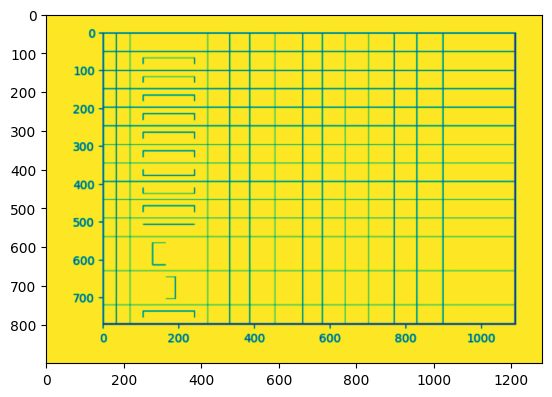

In [ ]:
#using pyplot to display images
plt.imshow(img)

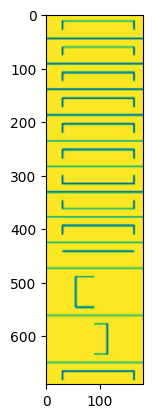

In [ ]:
#cropping image
img = img[100:790,220:400]
plt.imshow(img)

True

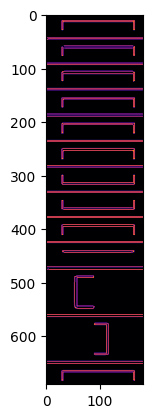

In [ ]:
#using Canny for Edges
edges = cv2.Canny(img, 50, 150)

plt.imshow(edges, cmap="inferno")

cv2.imwrite("cannyimg.jpg",edges)

In [ ]:
#Row Detection Function
def detect_rows(edges_img, min_width=5, max_width=150):

  row_sums = np.sum(edges_img, axis=1)
  row_threshold = 10

  in_row = False
  start = 0
  end = 0
  rows = []

  for i, sum_value in enumerate(row_sums):
    if sum_value > row_threshold and not in_row:
      start = i
      in_row = True
    elif sum_value <= row_threshold and in_row:
      end = i
      row_width = end - start
      if min_width <= row_width <= max_width:
        rows.append((start, end))
      in_row = False

  return rows

In [ ]:
# Create a folder for saving cropped row images
output_folder = "ShapesFinal"
if not os.path.exists(output_folder):
  os.makedirs(output_folder)


In [ ]:
# Load the Canny edge-detected image
img_path = "cannyimg.jpg"  # This should be the path to the edge-detected image
edges = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)


In [ ]:
# Define line width for border
line_width = 10

# Detect rows in the edge-detected image
detected_rows = detect_rows(edges)

In [ ]:
for idx, (start, end) in enumerate(detected_rows):
  row_img = edges[start:end, :]

  # Get original image shape
  height, width = row_img.shape[:2]

  # New height with border
  new_height = height + 2 * line_width

  # Create new image with black background and desired dimensions
  border_img = np.zeros((new_height, width), dtype=np.uint8)  # Adjust dtype if needed

  # Copy cropped image onto new image with border
  border_img[line_width:height+line_width, :] = row_img

  # Create filename for the row image
  row_path = os.path.join(output_folder, f"row_{idx}.jpg")

  # Save the image with border
  cv2.imwrite(row_path, border_img)

In [ ]:
print(f"Cropped {len(detected_rows)} row images to the '{output_folder}' folder.")

Cropped 13 row images to the 'ShapesFinal' folder.


In [ ]:
# Folder path containing the cropped images
image_folder = "ShapesFinal"

In [ ]:
# Define smaller dilation kernel
dilation_kernel = np.ones((2, 2), np.uint8)

In [ ]:
# Get all files in the folder
image_files = os.listdir(image_folder)

<ipython-input-32-7511c1059b73>:22: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)  # Convert to integer coordinates


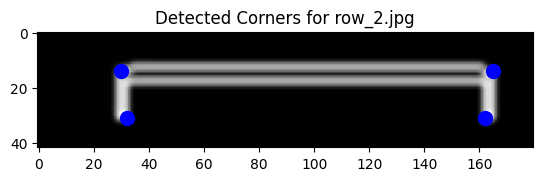

Image: row_2.jpg, Number of bends: 2


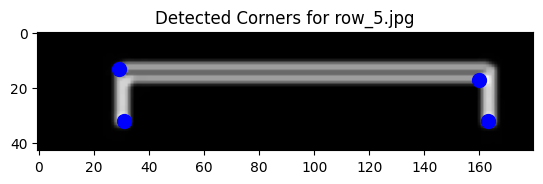

Image: row_5.jpg, Number of bends: 2


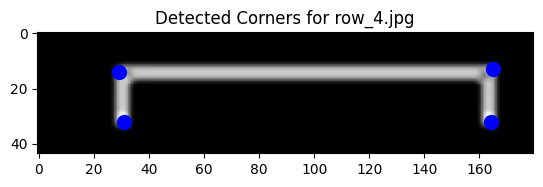

Image: row_4.jpg, Number of bends: 2


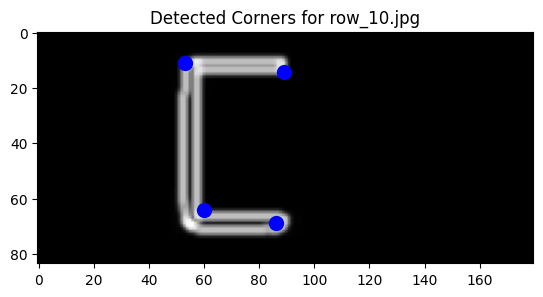

Image: row_10.jpg, Number of bends: 2


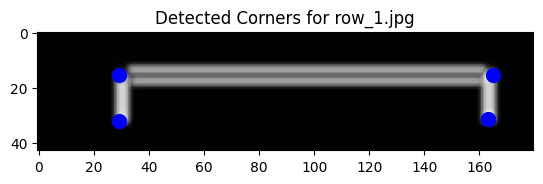

Image: row_1.jpg, Number of bends: 2


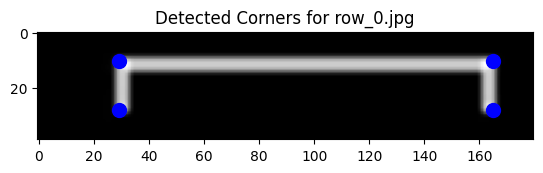

Image: row_0.jpg, Number of bends: 2


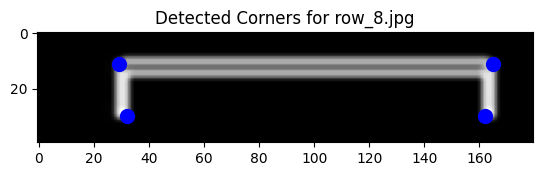

Image: row_8.jpg, Number of bends: 2


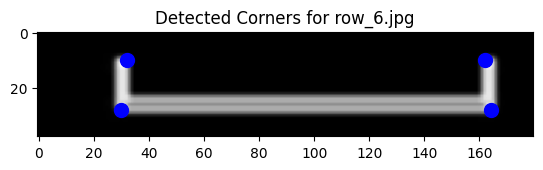

Image: row_6.jpg, Number of bends: 2


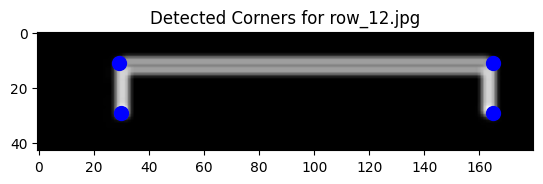

Image: row_12.jpg, Number of bends: 2


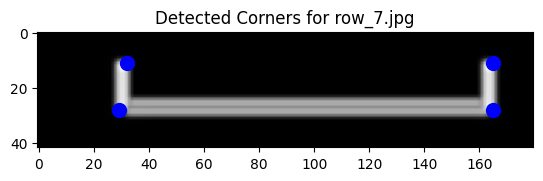

Image: row_7.jpg, Number of bends: 2


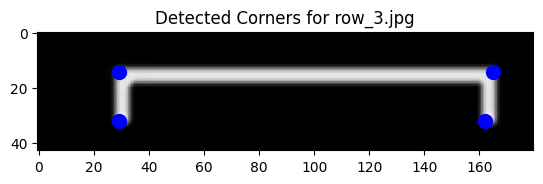

Image: row_3.jpg, Number of bends: 2


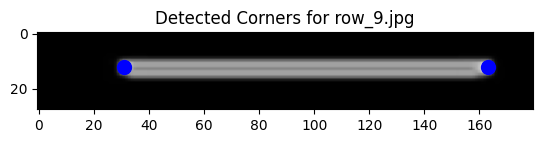

Image: row_9.jpg, Number of bends: 0


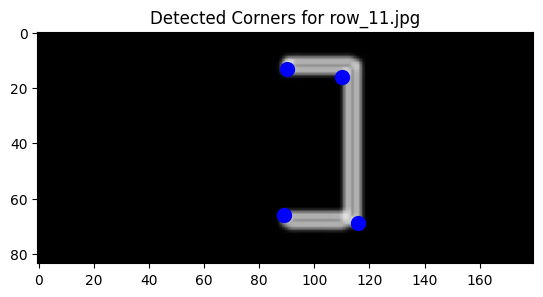

Image: row_11.jpg, Number of bends: 2


In [ ]:
# Loop through all image files in the folder
for image_file in image_files:
    if image_file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
        image_path = os.path.join(image_folder, image_file)

        # Read the image in grayscale
        cropped_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        # Apply Gaussian blur for noise reduction
        blurred_img = cv2.GaussianBlur(cropped_img, (5, 5), 0)

        # Apply smaller dilation to enhance edges with fewer extra corners
        dilated_img = cv2.dilate(blurred_img, dilation_kernel, iterations=1)

        # Shi-Tomasi corner detection with a lower quality level and minimum distance
        corners = cv2.goodFeaturesToTrack(
            dilated_img, maxCorners=30, qualityLevel=0.03, minDistance=15
        )

        # Ensure corners are detected
        if corners is not None:
            corners = np.int0(corners)  # Convert to integer coordinates

            # Calculate the number of bends (corners - 2)
            number_of_bends = len(corners) - 2

            # Create a new plot to display the corners
            plt.figure()
            plt.imshow(dilated_img, cmap='gray')
            plt.title(f"Detected Corners for {image_file}")

            # Plot corners with larger dots
            for corner in corners:
                x, y = corner.ravel()  # Get x and y coordinates
                plt.plot(x, y, 'bo', ms=10)

            # Show the plot
            plt.show()

            # Display the number of bends for this image
            print(f"Image: {image_file}, Number of bends: {number_of_bends}")
